# Exploratory Data Analysis 10
Plotting first-order communities found by InfoMap.

In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import signac
from util import fetch_geodata

project = signac.get_project()
job = project.find_jobs({"year": 2011, "quarter": 1}).next()

In [2]:
paths = pd.read_csv(job.fn('first_order_infomap.tree'), sep=' ', header=None, skiprows=2, names=['path', 'flow', 'ID', 'node'])
paths['path'] = paths['path'].apply(lambda x: tuple(map(int, x.split(':'))))
paths = paths.sort_values('path')
iatas = pd.read_csv(job.fn('airport_codes.csv'))
iatas['ID'] = pd.to_numeric(iatas['ID'])
iatas = iatas.set_index('ID')
airports = pd.merge(iatas, fetch_geodata(), left_on='IATA', right_index=True)
paths = pd.merge(paths, airports, left_on='ID', right_index=True)
paths = paths.sort_values('path')
paths

Reading airport geodata...


,path,flow,ID,node,IATA,name,lon,lat
0,"(1, 1, 1)",6.592530e-02,10397,29,ATL,Hartsfield Jackson Atlanta International Airport,-84.428101,33.636700
1,"(1, 1, 2)",4.533480e-02,13930,318,ORD,Chicago O'Hare International Airport,-87.904800,41.978600
2,"(1, 1, 3)",4.367130e-02,11292,115,DEN,Denver International Airport,-104.672997,39.861698
3,"(1, 1, 4)",4.258200e-02,11298,116,DFW,Dallas Fort Worth International Airport,-97.038002,32.896801
4,"(1, 1, 5)",4.035980e-02,11057,91,CLT,Charlotte Douglas International Airport,-80.943100,35.214001
5,"(1, 1, 6)",3.169800e-02,14107,332,PHX,Phoenix Sky Harbor International Airport,-112.012001,33.434299
6,"(1, 1, 7)",2.836330e-02,12892,239,LAX,Los Angeles International Airport,-118.407997,33.942501
7,"(1, 1, 8)",2.545450e-02,12266,204,IAH,George Bush Intercontinental Houston Airport,-95.341400,29.984400
8,"(1, 1, 9)",2.453330e-02,13487,302,MSP,Minneapolis-St Paul International/Wold-Chamber...,-93.221802,44.882000
9,"(1, 1, 10)",2.397230e-02,11433,124,DTW,Detroit Metropolitan Wayne County Airport,-83.353401,42.212399


In [3]:
def plot_community(paths, community=None):
    print('Generating plot...')
    fig = plt.figure(figsize=(6, 4), dpi=100)
    ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
    ax.set_extent([-128, -64, 22, 49], ccrs.Geodetic())

    shapename = 'admin_1_states_provinces_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)

    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    plt.title('Communit{} from First-Order Network ({}Q{})'.format(
        'ies' if community is None else 'y ' + str(community),
        job.sp.year, job.sp.quarter))

    def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.8594)
        return {'facecolor': facecolor, 'edgecolor': 'black'}

    ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),
        styler=colorize_state)

    xs = paths.lon.values
    ys = paths.lat.values
    colors = paths.flow.values
    sizes = 10000*paths.flow.values
    

    dots = ax.scatter(xs, ys, transform=ccrs.PlateCarree(), c=colors, s=sizes, alpha=0.8, zorder=10,
                      norm=mcolors.LogNorm(vmin=1e-4, vmax=1e-1), cmap='viridis')

    top_n = paths.sort_values('flow', ascending=False).head(20).index
    for row in paths.loc[top_n].itertuples():
        ax.annotate(row.IATA, (row.lon, row.lat), xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
                    fontsize=40*row.flow**0.2, zorder=11, ha='center', va='center')
    cbax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    cbar = plt.colorbar(dots, cax=cbax)
    cbar.set_label('Flow through node', rotation=90)
    #plt.savefig(job.fn('hon_communities.png'))
    plt.show()
    plt.close()

In [4]:
def get_community(paths, community_path):
    if len(community_path) == 3:
        left = tuple([*community_path[:-1], community_path[-1]-1])
        right = tuple([*community_path[:-1], community_path[-1]+1])
    else:
        left = tuple([*community_path, *(-1,)*(3-len(community_path))])
        right = tuple([*community_path[:-1], community_path[-1]+1, *(0,)*(3-len(community_path))])
    return paths[paths.path.between(left, right)]

(1, 1) 0.9820907732220002
Generating plot...


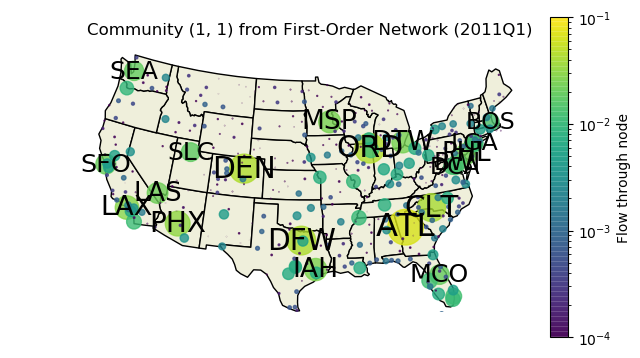

In [5]:
for community in paths.path.apply(lambda x: x[:2]).unique():
    data = get_community(paths, community)
    flow = sum(data.flow)
    print('{} {}'.format(community, flow))
    plot_community(data, community=community)